###Cho tập dữ liệu wine quality

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

####1. Đọc dữ liệu, sau đó hiển thị 5 dòng đầu tiên, thông tin và dữ liệu, thông tin và mô tả

In [5]:
# 1. Đọc dữ liệu
file_path = "/content/winequality-red.csv"
df = pd.read_csv(file_path, sep=";")

# Hiển thị 5 dòng đầu tiên
print("5 dòng đầu tiên của dữ liệu:")
print(df.head())

# Hiển thị thông tin dữ liệu
print("\nThông tin dữ liệu:")
df.info()

# Hiển thị thống kê mô tả
print("\nThống kê mô tả dữ liệu:")
print(df.describe())

5 dòng đầu tiên của dữ liệu:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   


Số lượng giá trị thiếu:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


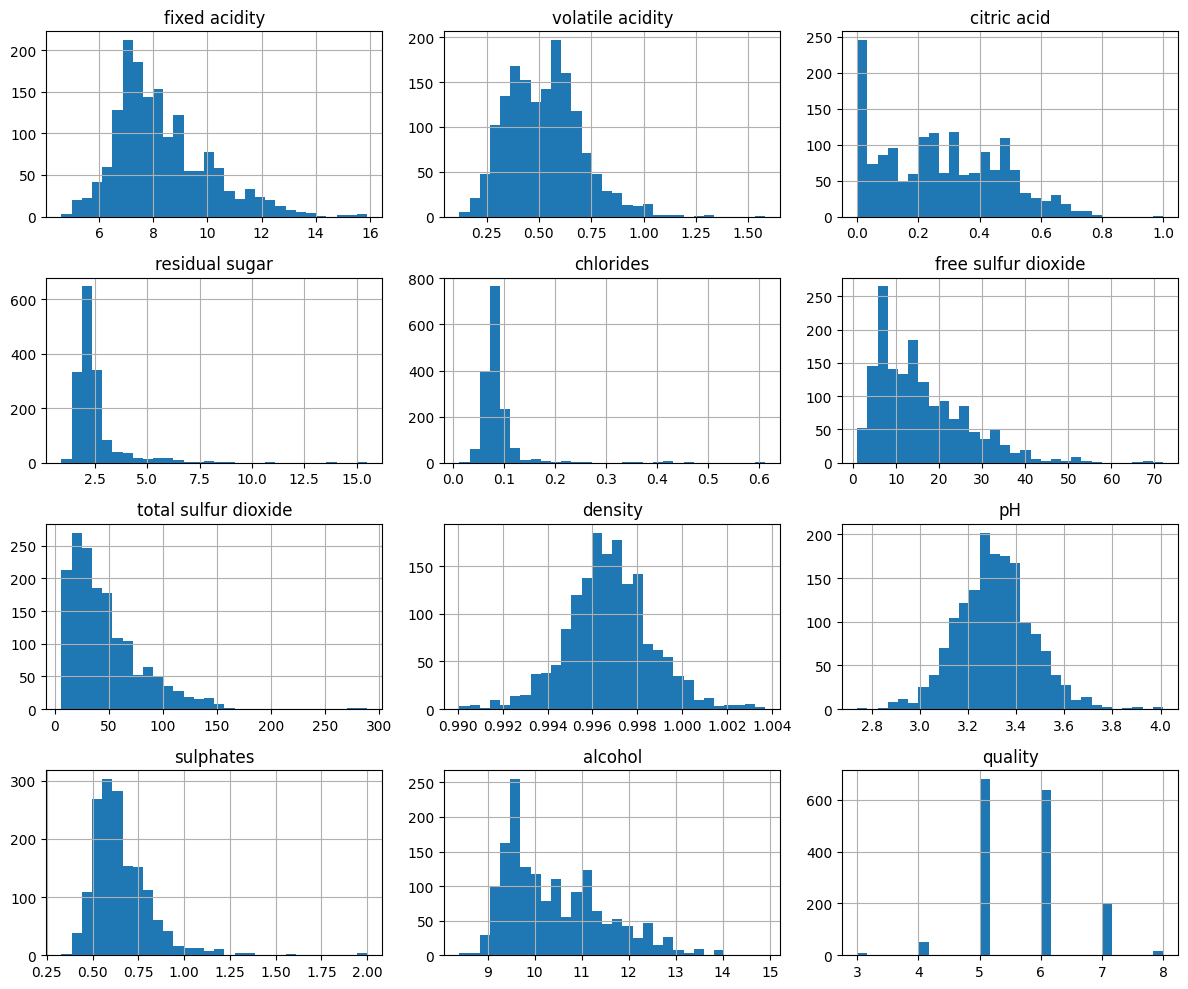

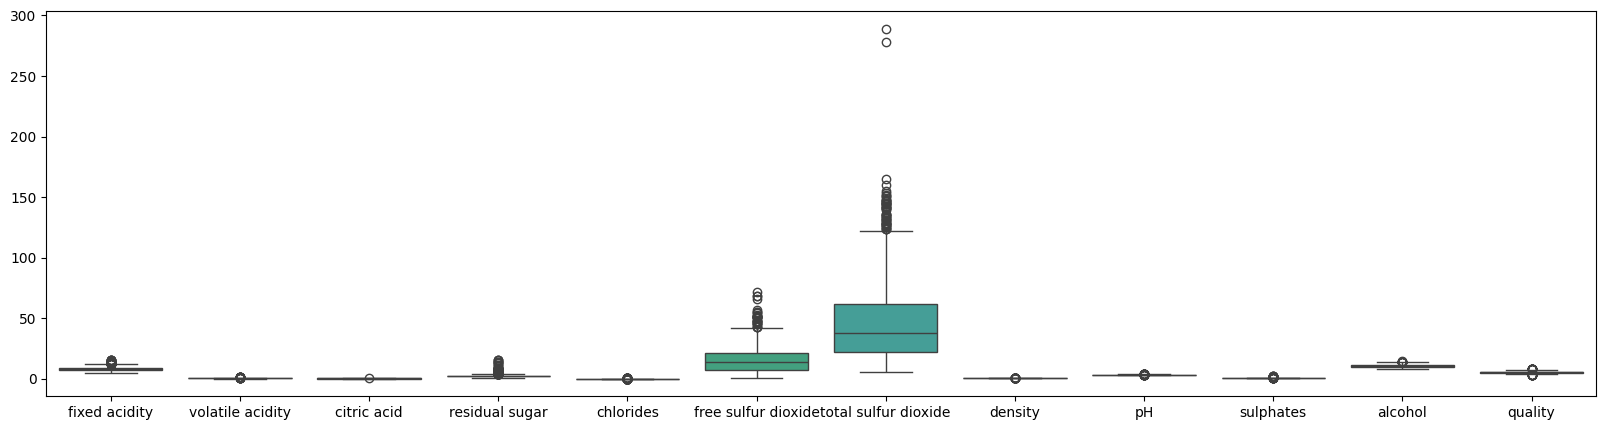

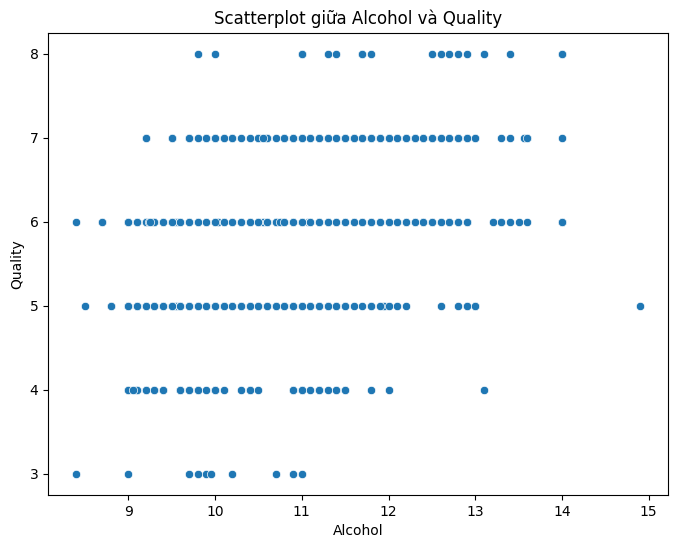


Nhận xét:
- Các histogram cho thấy phân phối của các biến. Một số biến có thể có phân phối lệch hoặc có outlier.
- Boxplot giúp phát hiện outlier trong các biến. Một số biến có thể có giá trị ngoại lệ đáng kể.
- Scatterplot cho thấy có mối quan hệ tuyến tính dương giữa Alcohol và Quality. Tức là rượu có nồng độ cồn cao hơn có xu hướng có chất lượng cao hơn.


In [6]:
#2. Phân tích khám phá dữ liệu

#2.1 Kiểm tra giá trị thiếu
giatrithieu = df.isnull().sum()
print("\nSố lượng giá trị thiếu:")
print(giatrithieu)
#2.2 về histogram cho tất cả các biến và nhận xét
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()
#2.3 và boxplot cho tất cả các biến và nhận xét
plt.figure(figsize=(20, 5))
sns.boxplot(data=df)
plt.show()
#2.4 ve Scatterplot cho "alcohol và "quality"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['alcohol'], y=df['quality'])
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Scatterplot giữa Alcohol và Quality")
plt.show()
#2.5 Nhận xét
print("\nNhận xét:")
print("- Các histogram cho thấy phân phối của các biến. Một số biến có thể có phân phối lệch hoặc có outlier.")
print("- Boxplot giúp phát hiện outlier trong các biến. Một số biến có thể có giá trị ngoại lệ đáng kể.")
print("- Scatterplot cho thấy có mối quan hệ tuyến tính dương giữa Alcohol và Quality. Tức là rượu có nồng độ cồn cao hơn có xu hướng có chất lượng cao hơn.")


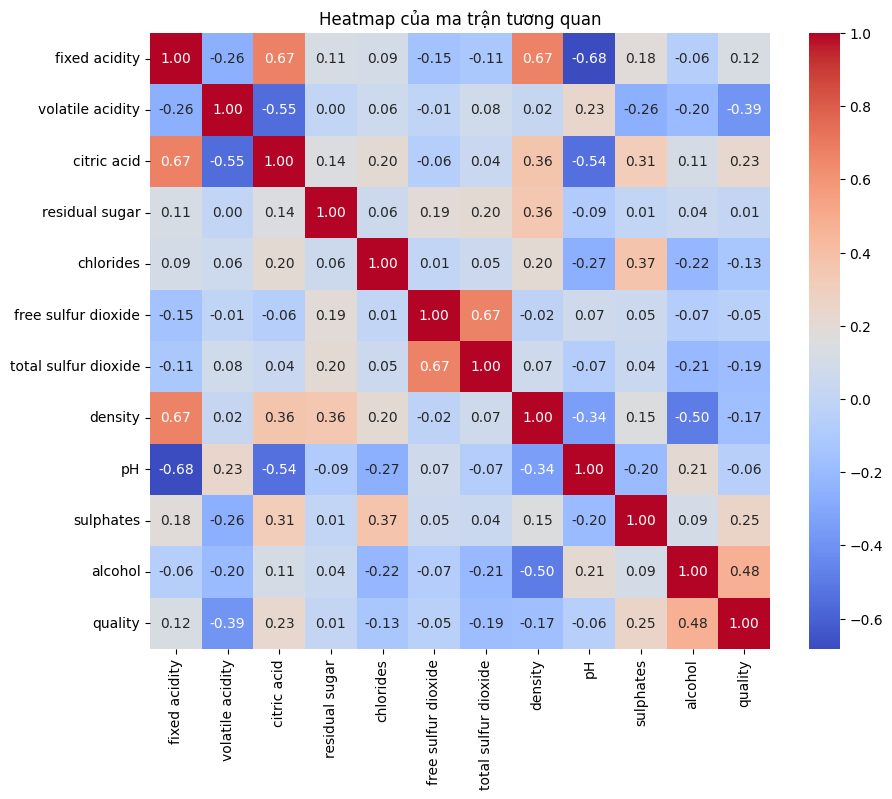

In [7]:
#3. Tính toán ma trận tương quan và về heatmap của ma trận tương quan đó
matran = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matran, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap của ma trận tương quan")
plt.show()

In [8]:
#4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn
#4.1 Xáo trộn dữ liệu
np.random.seed(42)
shuffled_indices = np.random.permutation(len(df))
df_shuffled = df.iloc[shuffled_indices].reset_index(drop=True)

# 4.2 Chia dữ liệu với 80% huấn luyện, 20% kiểm tra
train_size = int(0.8 * len(df_shuffled))
train_data = df_shuffled[:train_size]
test_data = df_shuffled[train_size:]

# 4.3 Tách dữ liệu (Lấy toàn bộ các cột trừ 'quality' làm đặc trưng)
X_train = train_data.drop(columns=["quality"])
X_test = test_data.drop(columns=["quality"])

# 4.4 Tách đặc trưng và nhãn
y_train = train_data["quality"]
y_test = test_data["quality"]

In [9]:
#5. Chuẩn bị dữ liệu

#5.1 Khởi tạo bộ dữ liệu chuẩn hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#5.2 Chuẩn hóa huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

#5.3 chuẩn hóa kiểm tra
X_test_scaled = scaler.transform(X_test)


In [10]:
#6. Ứng dụng mô hình hồi quy tuyến tính

#6.1 khởi tạo
model = LinearRegression()
#6.2 huấn luyện
model.fit(X_train_scaled, y_train)
#6.3 dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)
#7. Đánh giá mà hình
#Tính ISE và R^22
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.3500817859850649
R² Score: 0.4223966408083487


## Bài tập về nhà

In [18]:
import pandas as pd

# 1. Đọc dữ liệu
file_path = "/content/How Long We Live.csv"

df = pd.read_csv(file_path)

# Chuyển tên cột về chữ thường để tránh lỗi

df.columns = df.columns.str.strip().str.lower()

In [19]:
# 2.1 Kiểm tra số hàng và số cột
num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}, Số cột: {num_cols}")

Số hàng: 2938, Số cột: 22


In [20]:
# 2.2 Danh sách tên các cột
print("Danh sách tên các cột:")
print(df.columns.tolist())

Danh sách tên các cột:
['country', 'year', 'status', 'life expectancy', 'adult mortality', 'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years', 'thinness 5-9 years', 'income composition of resources', 'schooling']


In [21]:
# 2.3 Dữ liệu trong cột "status"
if 'status' in df.columns:
    print("Dữ liệu trong cột 'status':")
    print(df['status'])
else:
    print("Không tìm thấy cột 'status'")

Dữ liệu trong cột 'status':
0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: status, Length: 2938, dtype: object


In [22]:
# 2.4 Đếm số nước phát triển và đang phát triển
if 'status' in df.columns:
    developed_count = (df['status'] == 'Developed').sum()
    developing_count = (df['status'] == 'Developing').sum()
    print(f"Số nước phát triển: {developed_count}, Số nước đang phát triển: {developing_count}")

Số nước phát triển: 512, Số nước đang phát triển: 2426


In [23]:
# 2.5 Tính min, max, mean, median của cột 'alcohol'
if 'alcohol' in df.columns:
    print("Thống kê về alcohol:")
    print(f"Min: {df['alcohol'].min()}")
    print(f"Max: {df['alcohol'].max()}")
    print(f"Mean: {df['alcohol'].mean()}")
    print(f"Median: {df['alcohol'].median()}")
else:
    print("Không tìm thấy cột 'alcohol'")

Thống kê về alcohol:
Min: 0.01
Max: 17.87
Mean: 4.602860787172012
Median: 3.755


In [24]:
# Bài 1: Đếm số quốc gia có rượu cao hơn mức trung bình
if 'alcohol' in df.columns:
    alcohol_mean = df['alcohol'].mean()
    high_alcohol_countries = df[df['alcohol'] > alcohol_mean]
    print("Danh sách các quốc gia có mức tiêu thụ rượu cao hơn trung bình:")
    print(high_alcohol_countries['country'].tolist())

Danh sách các quốc gia có mức tiêu thụ rượu cao hơn trung bình:
['Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', '

In [25]:
# Bài 2: Lấy danh sách quốc gia có GDP và trình độ học vấn cao hơn mức trung bình
if 'gdp' in df.columns and 'schooling' in df.columns:
    gdp_mean = df['gdp'].mean()
    education_mean = df['schooling'].mean()
    high_gdp_education_countries = df[(df['gdp'] > gdp_mean) & (df['schooling'] > education_mean)]
    print("Danh sách quốc gia có GDP và trình độ học vấn cao hơn mức trung bình:")
    print(high_gdp_education_countries['country'].tolist())

Danh sách quốc gia có GDP và trình độ học vấn cao hơn mức trung bình:
['Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Argentina', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Azerbaijan', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Bahrain', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Barbados', 'Belarus', 'Belarus', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium'